In [1]:
from __future__ import print_function, division
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt  # to plot
import matplotlib as mpl

from scipy import optimize       # to compare



FIGSIZE = (19, 8)  #: Figure size, in inches!
mpl.rcParams['figure.figsize'] = FIGSIZE

def annealing(random_start,
              cost_function,
              random_neighbour,
              acceptance,
              temperature,
              maxsteps=1000,
              debug=True):
    """ Optimize the black-box function 'cost_function' with the simulated annealing algorithm."""
    state = random_start()
    cost = cost_function(state)
    states, costs = [state], [cost]
    for step in range(maxsteps):
        fraction = step / float(maxsteps)
        T = temperature(fraction)
        new_state = random_neighbour(state, fraction)
        new_cost = cost_function(new_state)
        if debug: print("Step #{:>2}/{:>2} : T = {:>4.3g}, state = {:>4.3g}, cost = {:>4.3g}, new_state = {:>4.3g}, new_cost = {:>4.3g} ...".format(step, maxsteps, T, state, cost, new_state, new_cost))
        if acceptance_probability(cost, new_cost, T) > rn.random():
            state, cost = new_state, new_cost
            states.append(state)
            costs.append(cost)
            # print("  ==> Accept it!")
        # else:
        #    print("  ==> Reject it...")
    return state, cost_function(state), states, costs

In [2]:
interval = (-5, 5)
a, b = interval
def f(x):
    return x**2 + 9

def clip(x):
    return max(min(x, b), a)
def random_start():
    return a + (b - a) * rn.random_sample()
def cost_function(x):
    return f(x)
def random_neighbour(x, fraction=1):
    """Move a little bit x, from the left or the right."""
    amplitude = (max(interval) - min(interval)) * fraction / 10
    delta = (-amplitude/2.) + amplitude * rn.random_sample()
    return clip(x + delta)
def acceptance_probability(cost, new_cost, temperature):
    if new_cost < cost:
        # print("    - Acceptance probabilty = 1 as new_cost = {} < cost = {}...".format(new_cost, cost))
        return 1
    else:
        p = np.exp(- (new_cost - cost) / temperature)
        # print("    - Acceptance probabilty = {:.3g}...".format(p))
        return p
def temperature(fraction):
    return max(0.01, min(1, 1 - fraction))

In [6]:
def plot_results(objective, bounds, figsize=(8,5)):
    x = np.linspace(*bounds, 100)
    y = objective(x)
    bound=[-1,1]
    w= np.linspace(*bound,np.asarray(states).shape[0])
    z= objective(np.asarray(states))

    plt.figure(figsize=figsize)
    plt.plot(x, y,label="actual")
    plt.plot(w,z, '--',label="hill climbing")
    plt.legend()
    plt.grid()
    plt.show()

In [4]:
objective = lambda x: x**2 + 9
bounds = [-10, 10]

In [ ]:
state, c, states, costs=annealing(random_start, cost_function, random_neighbour, acceptance_probability, temperature, maxsteps=1000, debug=True)

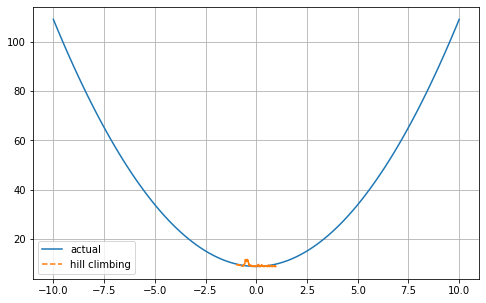

In [7]:
plot_results(objective, bounds)